<a href="https://colab.research.google.com/github/madaxe05/Gold-Price-Prediction/blob/main/final_Gold_price_prediction_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
# Load the dataset
# Replace 'gold_data.csv' with your dataset file
data = pd.read_csv('/content/3projectdataset - projectdataset.csv')

In [ ]:

# Data Cleaning
# Check for missing values
print(data.isnull().sum())
data = data.dropna()  # Drop rows with missing values


Date              0
price             0
interest rate     0
usd_buy           0
usd_sell          0
Inflation Rate    0
dtype: int64


In [ ]:

# Check for duplicates
data = data.drop_duplicates()


In [ ]:

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')


In [ ]:

# Extract features from the 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [ ]:

# Drop the original 'Date' column
data = data.drop('Date', axis=1)

In [ ]:


# Verify columns
print("Columns in dataset:", data.columns.tolist())


Columns in dataset: ['price', 'interest rate', 'usd_buy', 'usd_sell', 'Inflation Rate', 'Year', 'Month', 'Day']


In [ ]:

# Select features and target variable
X = data.drop('price', axis=1)  # Features (all columns except 'price')
y = data['price']  # Target variable


In [ ]:

# Split the data into training and testing sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Feature Scaling (Optional but recommended for some datasets)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:

# Train the model with the best parameters
best_rf = grid_search.best_estimator_


In [ ]:

# Cross-Validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean CV MSE:", -cv_scores.mean())


Cross-Validation MSE Scores: [539063.5214956  488457.84127852 459349.98010585 543087.86088048
 472568.90541598]
Mean CV MSE: 500505.62183528516


In [ ]:

# Model Evaluation on Test Data
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R2 Score:", r2)


Test MSE: 358970.08509113296
Test R2 Score: 0.999534137467706


In [ ]:

# Plot Actual vs Predicted Values with enhancements
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

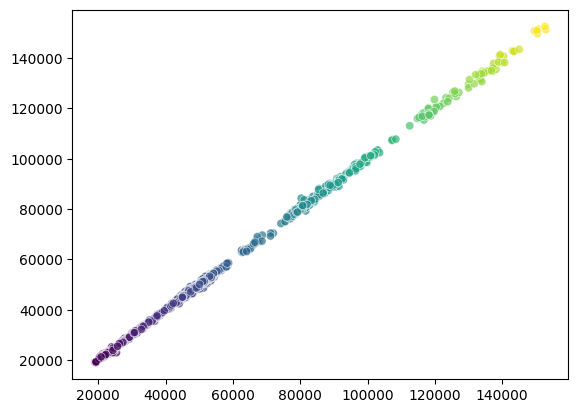

In [ ]:

# Scatter plot with color gradient
scatter = plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis', alpha=0.7, edgecolors='w', linewidths=0.5)


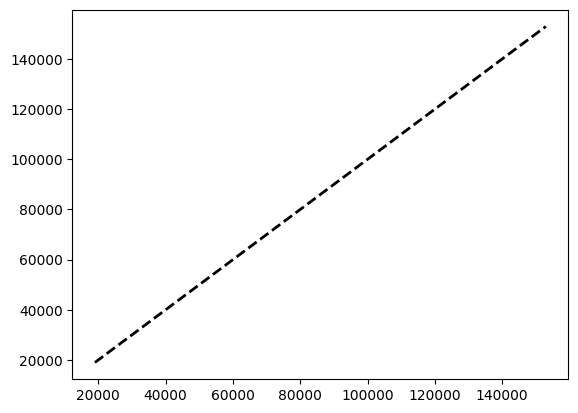

In [ ]:

# Add a 45-degree line (ideal case)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')


<Axes: xlabel='price'>

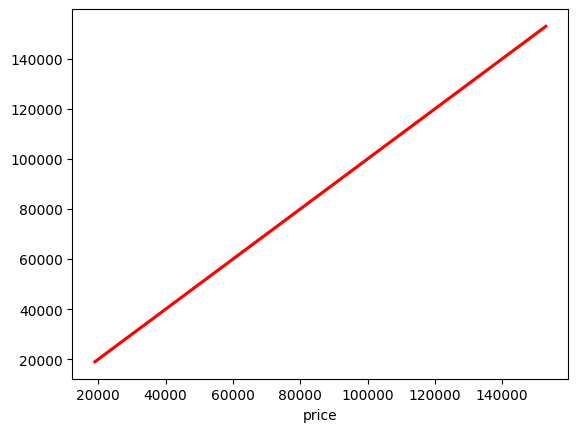

In [ ]:

# Add a regression line to show the trend
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Regression Line')


<ipython-input-21-396ef91edc97>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', fontsize=12)


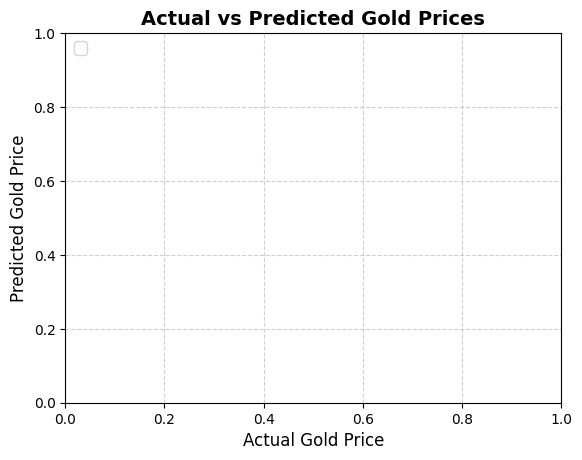

In [ ]:

# Add labels, title, and legend
plt.xlabel('Actual Gold Price', fontsize=12)
plt.ylabel('Predicted Gold Price', fontsize=12)
plt.title('Actual vs Predicted Gold Prices', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)


In [ ]:

# Add a colorbar for the scatter plot
cbar = plt.colorbar(scatter)
cbar.set_label('Predicted Gold Price', fontsize=12)


<ipython-input-22-4b059227754c>:2: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter)


<Figure size 640x480 with 0 Axes>

In [ ]:

# Show the plot
plt.show()


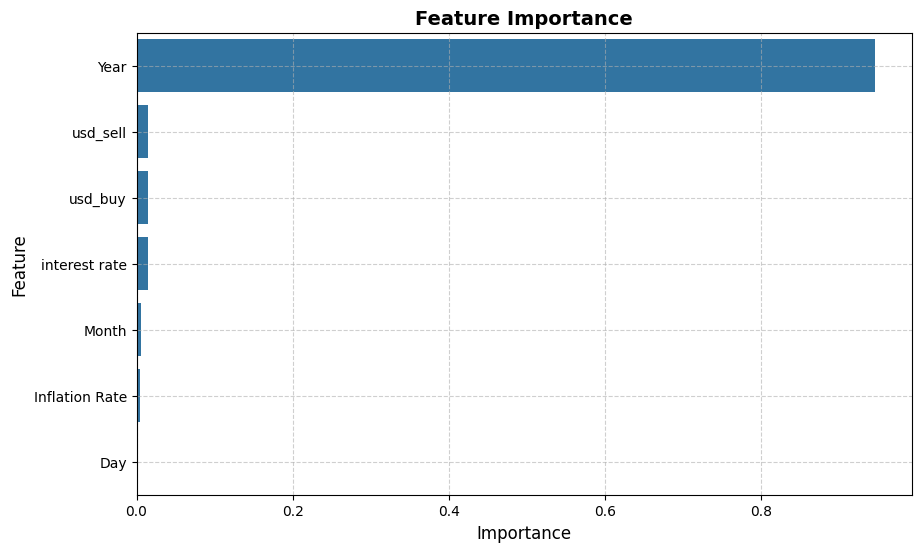

In [ ]:

# Feature Importance
feature_importances = best_rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:

# Save the model, scaler, and feature list
import pickle
pickle.dump(best_rf, open('gold_price_rf_model.pkl', 'wb'))
pickle.dump(scaler, open('gold_price_scaler.pkl', 'wb'))
pickle.dump(list(X.columns), open('gold_price_features.pkl', 'wb'))

print("Model, scaler, and feature list saved successfully!")


Model, scaler, and feature list saved successfully!


In [ ]:

# Manual input for the month and year
manual_month = int(input("Enter the month (1-12): "))  # Example: 10
manual_year = int(input("Enter the year (e.g., 2023): "))  # Example: 2023


Enter the month (1-12): 2
Enter the year (e.g., 2023): 2025


In [ ]:

# Create a date range for the specified month
start_date = pd.Timestamp(year=manual_year, month=manual_month, day=1)
end_date = start_date + pd.DateOffset(months=1) - pd.DateOffset(days=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency


In [ ]:

# Create a DataFrame for the month
monthly_data = pd.DataFrame({
    'Date': date_range,
    'interest rate': 6.5,       # Example value (can be dynamic)
    'usd_buy': [138.28, 138.28, 138.28, 139.2, 139.02, 139.65, 139.83, 139.59, 139.59, 139.59, 139.67, 138.63, 138.74, 138.74, 138.62, 138.62, 138.62, 138.71, 138.83, 138.83, 138.36, 138.45, 138.45, 138.45, 138.42, 139.24, 139.24, 139.23],  # Example value (can be dynamic)
    'usd_sell': [1138.88, 138.88, 138.88, 139.8, 139.62, 140.25, 140.43, 140.19, 140.19, 140.19, 140.27, 139.23, 139.34, 139.34, 139.22, 139.22, 139.22, 139.31, 139.43, 139.43, 138.96, 139.05, 139.05, 139.05, 139.02, 139.84, 139.84, 139.83],  # Example value (can be dynamic)
    'Inflation Rate': 6.05      # Example value (can be dynamic)
})


In [ ]:

# Extract Year, Month, and Day from the Date column
monthly_data['Year'] = monthly_data['Date'].dt.year
monthly_data['Month'] = monthly_data['Date'].dt.month
monthly_data['Day'] = monthly_data['Date'].dt.day


In [ ]:

# Drop the original Date column
monthly_data = monthly_data.drop('Date', axis=1)


In [ ]:

# Scale the monthly data using the same scaler used for training
monthly_data_scaled = scaler.transform(monthly_data)


In [ ]:

# Make predictions for the month
monthly_predictions = best_rf.predict(monthly_data_scaled)


In [ ]:

# Add predictions to the DataFrame
monthly_data['Predicted_Price'] = monthly_predictions


In [ ]:

# Print the predictions
print(f"Gold Price Predictions for {start_date.strftime('%B %Y')}:")
print(monthly_data[['Year', 'Month', 'Day', 'Predicted_Price']])


Gold Price Predictions for February 2025:
    Year  Month  Day  Predicted_Price
0   2025      2    1    147868.291052
1   2025      2    2    145453.417900
2   2025      2    3    145600.381780
3   2025      2    4    149288.591978
4   2025      2    5    149796.200554
5   2025      2    6    150239.308316
6   2025      2    7    150312.323704
7   2025      2    8    150543.500220
8   2025      2    9    150945.668044
9   2025      2   10    151863.142552
10  2025      2   11    151587.410320
11  2025      2   12    151112.460384
12  2025      2   13    151317.743264
13  2025      2   14    150855.506870
14  2025      2   15    149860.818006
15  2025      2   16    149869.099304
16  2025      2   17    151326.141200
17  2025      2   18    152442.483498
18  2025      2   19    152585.131772
19  2025      2   20    152593.879622
20  2025      2   21    150179.006470
21  2025      2   22    152309.282902
22  2025      2   23    152322.462996
23  2025      2   24    153058.332138
24  2025

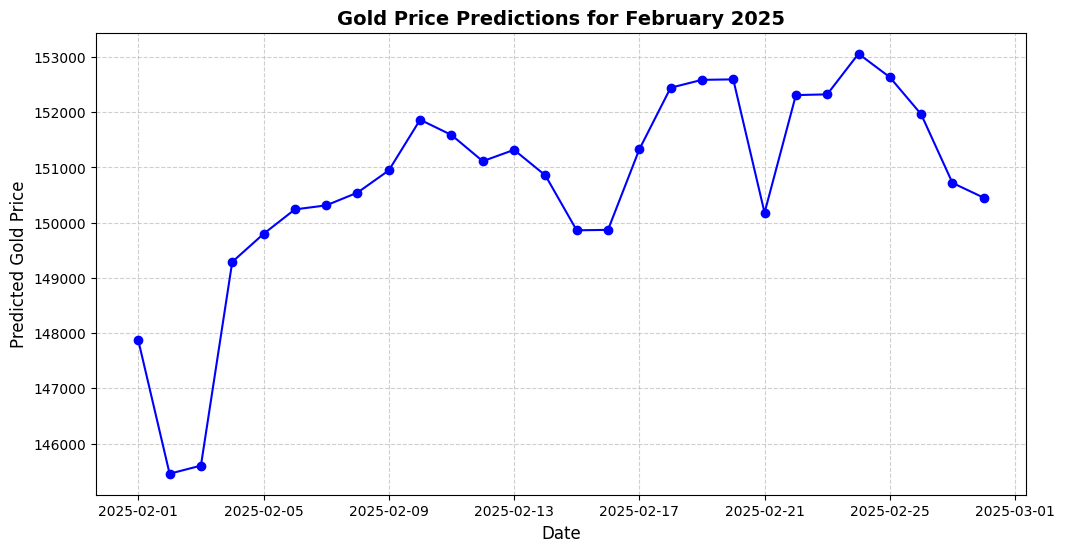

In [ ]:

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(date_range, monthly_predictions, marker='o', linestyle='-', color='b')
plt.title(f'Gold Price Predictions for {start_date.strftime("%B %Y")}', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Gold Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:


# Take actual values as input dynamically
dates = pd.date_range(start=start_date, end=end_date, freq='D')  # Using previously defined start_date and end_date
actual_prices = []


In [ ]:

# Print instructions for user input
print(f"Enter actual gold prices for {start_date.strftime('%B %Y')} (Enter {len(dates)} values):")


Enter actual gold prices for February 2025 (Enter 28 values):


In [ ]:

# Predefined actual prices (replace with user input if needed)
actual_prices = [
    145307.6204, 145307.6204, 145797.5, 148573.4844, 150428.0286,
    150078.1146, 150276.3992, 150276.3992, 150276.3992, 152690.8058,
    150754.615, 151361.1326, 152935.7456, 149553.2436, 149553.2436,
    149553.2436, 151034.5462, 153169.0216, 152795.78, 152690.8058,
    152189.2624, 152189.2624, 152189.2624, 153507.2718, 152329.228,
    152504.185, 150369.7096, 149856.5024
]

In [ ]:


# Ensure the predicted prices array is already available
predicted_prices = monthly_predictions  # Using previously predicted values


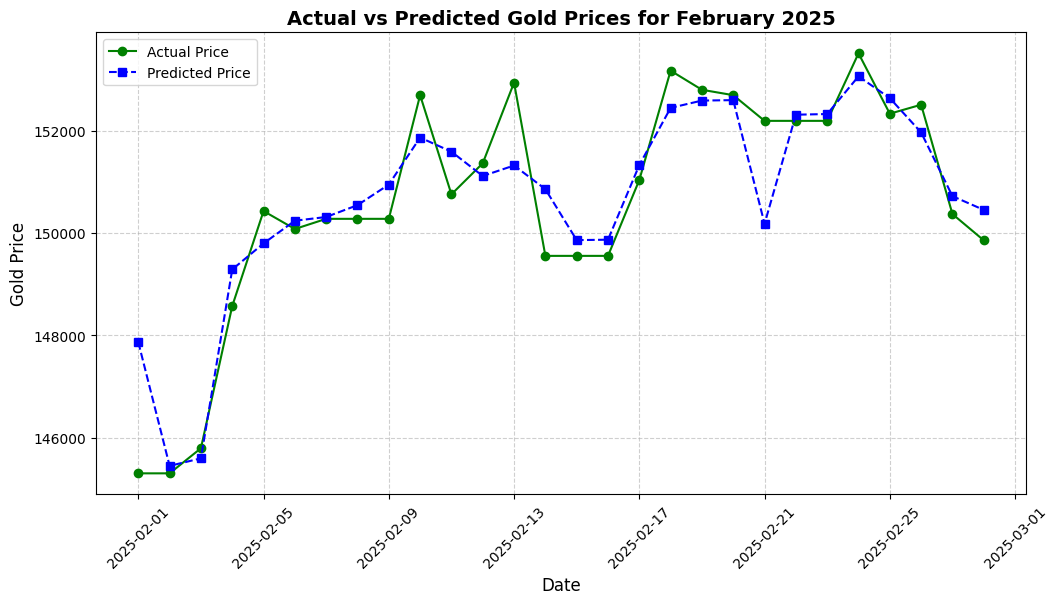

In [ ]:

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(dates, actual_prices, marker='o', linestyle='-', color='g', label='Actual Price')
plt.plot(dates, predicted_prices, marker='s', linestyle='--', color='b', label='Predicted Price')

plt.title(f'Actual vs Predicted Gold Prices for {start_date.strftime("%B %Y")}', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gold Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


In [ ]:

# Calculate and display error metrics
mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.4f}")

Mean Squared Error (MSE): 708027.67
R-squared Score (R2): 0.8550
